# Obserwacje odstające

In [ ]:
import pandas as pd
import sklearn.tree

import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data["target"] = boston.target

## Jednowymiarowe outliery

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.describe(percentiles=np.linspace(0,1,11))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
0%,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
10%,0.038195,0.000000,2.910000,0.000000,0.427000,5.593500,26.950000,1.628300,3.000000,233.000000,14.750000,290.270000,4.680000,12.750000
20%,0.064170,0.000000,4.390000,0.000000,0.442000,5.837000,37.800000,1.951200,4.000000,273.000000,16.600000,364.310000,6.290000,15.300000
30%,0.099245,0.000000,5.960000,0.000000,0.472000,5.950500,52.400000,2.259650,4.000000,289.000000,17.800000,378.665000,7.765000,18.200000
40%,0.150380,0.000000,7.380000,0.000000,0.507000,6.086000,65.400000,2.640300,5.000000,307.000000,18.400000,387.970000,9.530000,19.700000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000


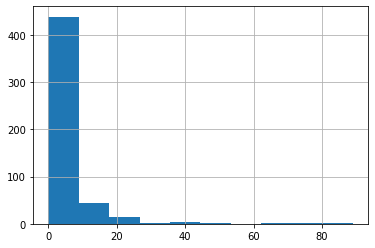

In [ ]:
data["CRIM"].hist()

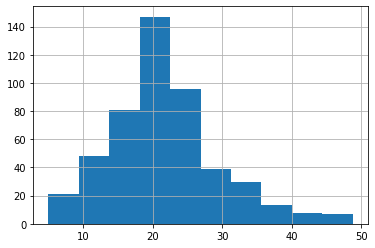

In [ ]:
data["target"].hist()

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Outliery od zależności

(dwa wymiary)

In [ ]:
data = data[data["target"] < 50]

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

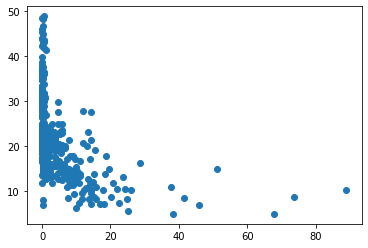

In [ ]:
plt.scatter(data["CRIM"], data["target"])

### Regresja liniowa 

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = sm.add_constant(data["RM"])

In [ ]:
X = sm.add_constant(data["RM"])
model = sm.OLS(data["target"], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     435.3
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.41e-69
Time:                        09:16:46   Log-Likelihood:                -1549.2
No. Observations:                 490   AIC:                             3102.
Df Residuals:                     488   BIC:                             3111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.0051      2.489    -12.057      0.0

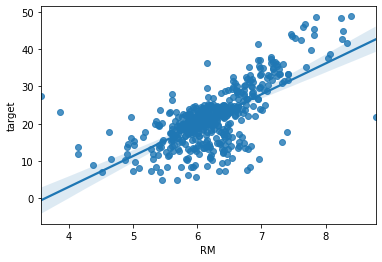

In [ ]:
import seaborn as sns

sns.regplot(x='RM', y='target', data=data)

In [ ]:
data_fltrd = data.copy()
data_fltrd = data_fltrd[~((data_fltrd["target"]>49) & (data_fltrd["RM"]<7.5))]
data_fltrd = data_fltrd[~((data_fltrd["target"]>10) & (data_fltrd["RM"]<5))]
data_fltrd = data_fltrd[~((data_fltrd["target"]<30) & (data_fltrd["RM"]>8))]

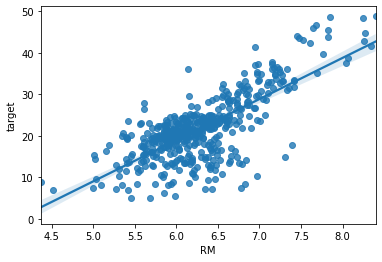

In [ ]:
sns.regplot(x='RM', y='target', data=data_fltrd)

In [ ]:
X = sm.add_constant(data_fltrd["RM"])
model = sm.OLS(data_fltrd["target"], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     567.8
Date:                Sun, 09 May 2021   Prob (F-statistic):           3.84e-83
Time:                        09:19:16   Log-Likelihood:                -1473.3
No. Observations:                 477   AIC:                             2951.
Df Residuals:                     475   BIC:                             2959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.4256      2.622    -15.420      0.0

### Drzewa

In [ ]:
dtree = DecisionTreeRegressor(min_samples_leaf=10, max_depth=5)
dtree.fit(data_fltrd[["RM"]], data_fltrd["target"])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-cp37-none-any.whl size=66642 sha256=e82f7fa4c3ba7106cdd7ea33db42588756775a0f4b163ef251be3942477ab8c0
  Stored in directory: /root/.cache/pip/wheels/60/36/b1/188ee35c677e48463f6482d580f81c19f5f82ae5adbe293fd8
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


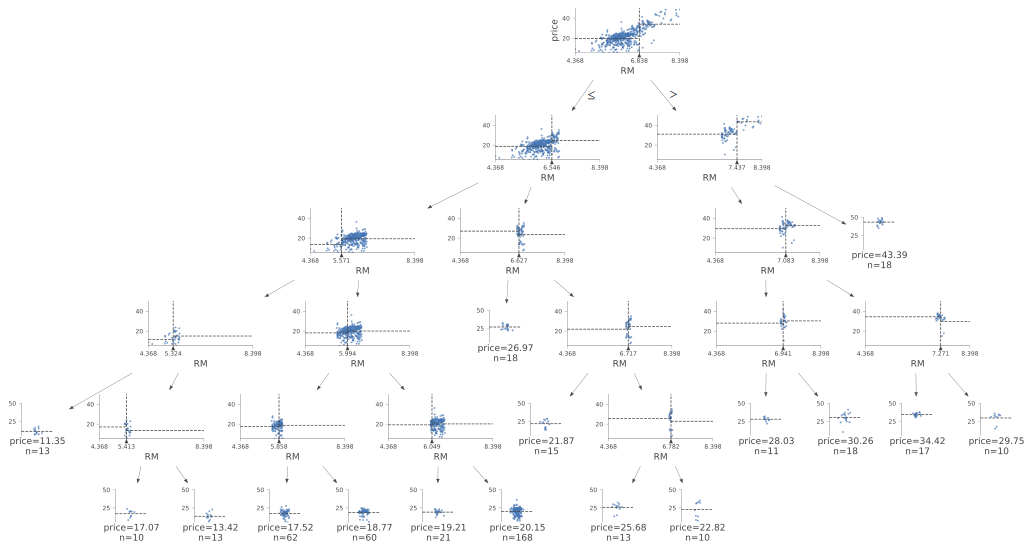

In [ ]:
import dtreeviz.trees as dtv
dtv.dtreeviz(dtree, data_fltrd[["RM"]], data_fltrd["target"], target_name='price', feature_names=["RM"])

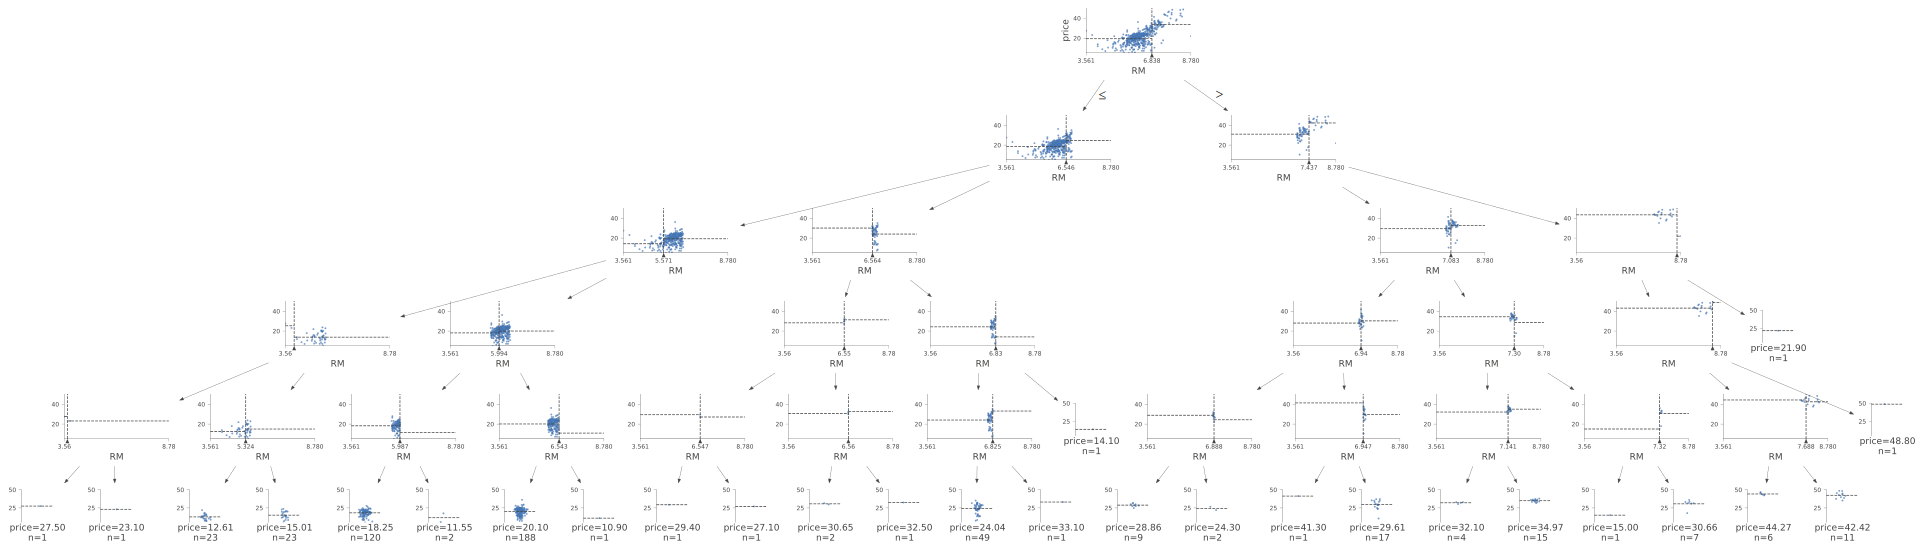

In [ ]:
dtree = DecisionTreeRegressor(min_samples_leaf=1, max_depth=5)
dtree.fit(data["RM"].values.reshape(-1, 1), data["target"])
dtv.dtreeviz(dtree, data["RM"].values.reshape(-1, 1), data["target"], target_name='price', feature_names=["RM"])

# Brakujące wartości

Czego **NIE** robić:
- zastępowanie średnią
- usuwanie obserwacji

Co w takim razie?
1. Zastanowić się co sprawiało, że mamy brakujące wartości
(opcjonalnie) jaki to mechanizm statystyczny? MAR, MCAR, MNAR?
2. Jeśli nie potrzebujemy "sensownych" wartości (nie robimy klasycznej regresji liniowej) wypełnić skrajnie dużymi lub małymi wartościami (w większości przyadków ok)
3. Jeśli potrzebujemy wartości, rozważyć hot-deck-enckoding, wypełnienie wprzód, lub w tył, albo inny rodzaj imputacji.
(opcjonalnie) dokładamy zmienne indykatorowe na przypadk braków

polecam post i kurs - https://towardsdatascience.com/handling-missing-data-5be11eddbdd


Dla szergów czasowych interpolacja, lub forward/backward fill

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html

Dla innych zmiennych hot-deck, KNNImputer 
from sklearn.impute import KNNImputer

# Tranfsormacje zmiennnych

Poza omawianą już transofrmację logarytmiczną, możemy stosować też bardziej ogólną metodę - tranfsormację Box-Coxa.
${\dfrac {y^{\lambda }-1}{\lambda }}$

 Może być ona przydatna w wypadkach gdy potrzebne jest bardziej lub mniej ekstrmalne przekształcenie.

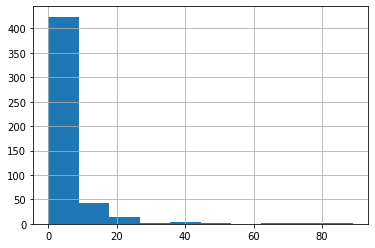

In [ ]:
data["CRIM"].hist()

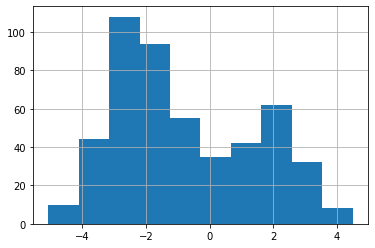

In [ ]:
np.log(data["CRIM"]).hist()

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt = PowerTransformer(method="box-cox")
pt.fit(data[["CRIM"]])
pt.lambdas_

array([-0.12482873])

(array([ 3., 13., 37., 77., 94., 65., 47., 42., 89., 23.]),
 array([-2.55877328, -2.10461712, -1.65046095, -1.19630478, -0.74214862,
        -0.28799245,  0.16616371,  0.62031988,  1.07447604,  1.52863221,
         1.98278837]),
 <a list of 10 Patch objects>)

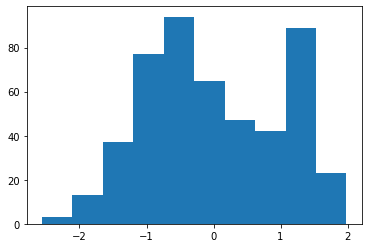

In [ ]:
plt.hist(pt.transform(data[["CRIM"]]))

# XAI - explainable AI

https://christophm.github.io/interpretable-ml-book/

## Feature importance

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [ ]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)

In [ ]:
model = LGBMRegressor(
        num_leaves=31,
        max_depth=-1,
        min_child_samples=10,
        learning_rate=0.1,
        n_estimators=300)

model.fit(X, boston.target)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=10, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=300, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

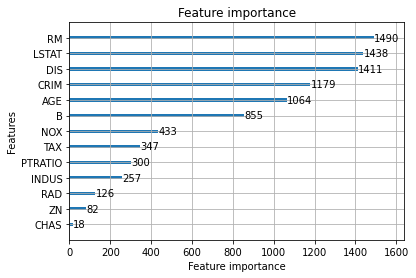

In [ ]:
lgb.plot_importance(model)

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Shaply values through SHAP

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 6.5MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491625 sha256=adb1fbdfb616a8a063ac05f895e8e593a540d7344e4331028b2c6c47744d0cd1
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X)

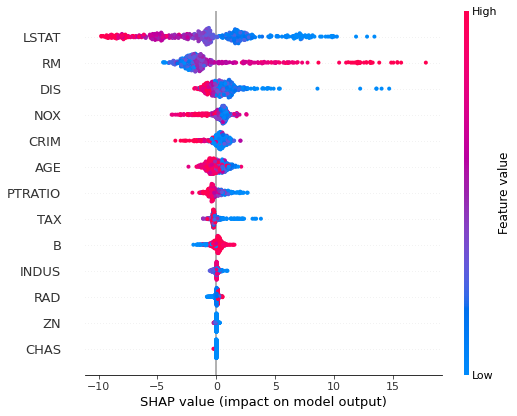

In [ ]:
shap.summary_plot(shap_values, X)

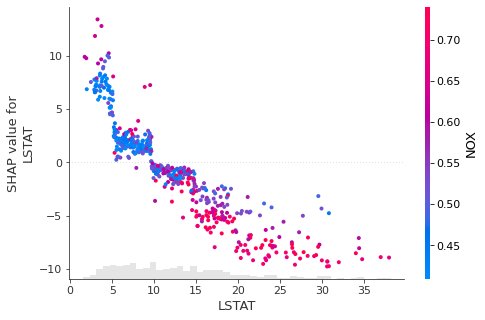

In [ ]:
shap.plots.scatter(shap_values[:,"LSTAT"], color=shap_values)

In [ ]:
#https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Force%20Plot%20Colors.html

AssertionError: ignored